In [2]:
cd ~/umn_bootcamp/capstone_project/china_data/SO2_data/cleaned_SO2_data

/Users/josephmacula/umn_bootcamp/capstone_project/china_data/SO2_data/cleaned_SO2_data


In [3]:
import os
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
working_path = os.getcwd() #I already set my working directory to the desired one, so this os method just grabs that path
working_files = [file for file in os.listdir() if file.endswith('.csv')] #get the list of filenames
working_files

['cleaned_Shenzhen.csv',
 'cleaned_Chengdu.csv',
 'cleaned_Baotou.csv',
 'cleaned_Wuhan.csv',
 'cleaned_Beijing.csv',
 'cleaned_Kunming.csv',
 'cleaned_Panzhihua.csv',
 'cleaned_Shuozhou.csv',
 'cleaned_Chongqing.csv',
 'cleaned_Shanghai.csv',
 'cleaned_Ganzhou.csv',
 'cleaned_Guangzhou.csv',
 'cleaned_Quanzhou.csv']

In [27]:
#This code creates, for each csv filename in the working_files list, a dataframe with median NO2 values for each month from January 2014 to 
#July 2025 and a corresponding name for that dataframe (to keep track of what data is from what city). The [name, dataframe] pairs are passed
#to the data_frames list as lists. 


data_frames = []

substrings_to_remove = ['cleaned_', '.csv']

for i in working_files:
    df = pd.read_csv(i)
    for j in substrings_to_remove:
        i = i.replace(j, '')
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    median_monthly_values = df.groupby(['year', 'month'])['SO2_reading'].mean().reset_index()
    median_monthly_values['month_year'] = median_monthly_values['month'].astype(str) + '-' + median_monthly_values['year'].astype(str)
    
    data_frames.append([i, median_monthly_values])

In [28]:
#renaming NO2_reading columns so that the merged dataframe (created below) has column names that make it clear what the NO2 readings are for
#each city. 

for i in data_frames:
    i[1].rename(columns = {'SO2_reading':i[0]}, inplace = True)

In [29]:
#creating a single dataframe that has separate columns with median NO2 estimates for each city. 

combined_data_frame = data_frames[0][1]
combined_data_frame = combined_data_frame[['year', 'month', 'month_year', 'Shenzhen']]
for i in range(1, len(data_frames)):
    df = data_frames[i][1].iloc[:,-2:]
    combined_data_frame = combined_data_frame.merge(df, how='left', left_on='month_year', right_on='month_year')

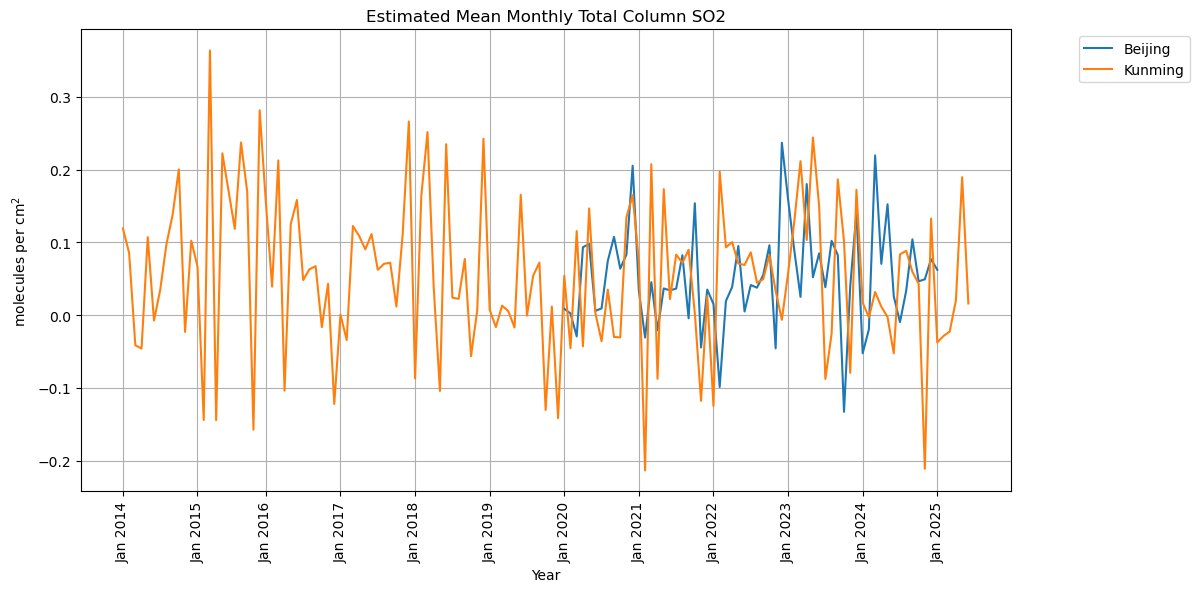

In [36]:
#Plotting the data for all the cities. This code is easily modified to plot only data from some of the cities.

fig, ax = plt.subplots(figsize = (12,6))
for i in range(7, 9):
    ax.plot(combined_data_frame['month_year'], combined_data_frame.iloc[:,i], label = combined_data_frame.columns[i])
tick_positions = median_monthly_values['month_year'][::12]
tick_labels = tick_positions.apply(lambda x: 'Jan ' + x[2::])
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation='vertical')
plt.xlabel('Year')
plt.ylabel('molecules per cm$^2$')
plt.title('Estimated Mean Monthly Total Column SO2')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.2,1))
plt.grid()
plt.show()

In [24]:
combined_data_frame

,year,month,month_year,Shenzhen,Chengdu,Baotou,Wuhan,Beijing,Kunming,Panzhihua,Shuozhou,Chongqing,Shanghai,Ganzhou,Guangzhou,Quanzhou
0,2014,1,1-2014,0.032631,0.100154,-0.057523,0.180000,NaN,-0.018293,0.074033,0.202085,-0.010000,0.199216,-0.020407,0.225848,0.038032
1,2014,2,2-2014,-0.018022,0.032428,0.314644,0.122550,NaN,0.013487,0.019494,0.142996,-0.021557,0.294707,-0.010119,-0.007935,0.085788
2,2014,3,3-2014,-0.063047,0.011140,0.210759,0.067070,NaN,-0.090282,0.076450,0.143625,0.009928,0.110458,0.102618,0.140781,-0.138064
3,2014,4,4-2014,-0.120000,0.013591,0.122990,0.077453,NaN,-0.013780,0.057678,0.144056,0.067876,0.046355,0.157438,0.021334,-0.154331
4,2014,5,5-2014,0.157118,0.095059,0.123969,0.114523,NaN,0.069373,0.096516,0.114197,0.011087,0.020000,0.047194,0.135453,0.115701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2025,2,2-2025,0.079708,0.024905,-0.020496,-0.093168,NaN,-0.046093,0.172989,-0.046581,0.086103,0.162036,-0.029236,-0.008974,0.079488
133,2025,3,3-2025,0.188671,0.047638,0.004748,0.038664,NaN,0.002505,0.066250,0.046129,0.008693,0.015444,0.000491,0.055396,0.139137
134,2025,4,4-2025,0.104984,0.058210,0.021645,0.083920,NaN,0.067565,0.103433,-0.012937,0.027139,0.050929,0.056846,0.160000,0.047132
135,2025,5,5-2025,0.214803,0.191151,-0.046823,0.089864,NaN,0.207431,-0.013960,-0.040000,-0.010301,0.141580,-0.048190,0.002797,0.048934


In [35]:
plt.grid?

Signature:
plt.grid(
    visible: 'bool | None' = None,
    which: "Literal['major', 'minor', 'both']" = 'major',
    axis: "Literal['both', 'x', 'y']" = 'both',
    **kwargs,
) -> 'None'
Docstring:
Configure the grid lines.

Parameters
----------
visible : bool or None, optional
    Whether to show the grid lines.  If any *kwargs* are supplied, it
    is assumed you want the grid on and *visible* will be set to True.

    If *visible* is *None* and there are no *kwargs*, this toggles the
    visibility of the lines.

which : {'major', 'minor', 'both'}, optional
    The grid lines to apply the changes on.

axis : {'both', 'x', 'y'}, optional
    The axis to apply the changes on.

**kwargs : `~matplotlib.lines.Line2D` properties
    Define the line properties of the grid, e.g.::

        grid(color='r', linestyle='-', linewidth=2)

    Valid keyword arguments are:

    Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n